<a href="https://colab.research.google.com/github/ziegeo/2021-CS109A/blob/master/e104_ziegner_georg_hw10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: left; padding-right: 10px; width: 45px" src="https://upload.wikimedia.org/wikipedia/en/8/89/ExtensionFlag.png"> CSCI-E104: Advanced Deep Learning

## Homework 10 - Stable Diffusion




**Harvard University**<br/>
**Spring 2023**<br/>
**Instructors**: Zoran Djordjevic


<hr style="height:2pt">

#### Problem 1 (30%)

Please open a Stable.ai account and use DreamStudio.

a)	Create an image of an artist elephant painting a tree.

b)	Upload an image of a Lego character and create a human like image.

In both cases, please use both a positive and a negative prompt.

#### Problem 2 (35%)

Install a local copy of Stable Diffusion 2.x. Repeat tasks a) and b) locally. In both cases a) and b) please use both a positive and a negative prompt. 

In [ ]:
%cd /content

%env TF_CPP_MIN_LOG_LEVEL=1

!apt -y update -qq
!wget http://launchpadlibrarian.net/367274644/libgoogle-perftools-dev_2.5-2.2ubuntu3_amd64.deb
!wget https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/google-perftools_2.5-2.2ubuntu3_all.deb
!wget https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/libtcmalloc-minimal4_2.5-2.2ubuntu3_amd64.deb
!wget https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/libgoogle-perftools4_2.5-2.2ubuntu3_amd64.deb
!apt install -qq libunwind8-dev
!dpkg -i *.deb
%env LD_PRELOAD=libtcmalloc.so
!rm *.deb

!apt -y install -qq aria2
!pip install -q torch==1.13.1+cu116 torchvision==0.14.1+cu116 torchaudio==0.13.1 torchtext==0.14.1 torchdata==0.5.1 --extra-index-url https://download.pytorch.org/whl/cu116 -U
!pip install -q xformers==0.0.16 triton==2.0.0 -U

!git clone -b v2.1 https://github.com/camenduru/stable-diffusion-webui
!git clone https://huggingface.co/embed/negative /content/stable-diffusion-webui/embeddings/negative
!git clone https://huggingface.co/embed/lora /content/stable-diffusion-webui/models/Lora/positive
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/embed/upscale/resolve/main/4x-UltraSharp.pth -d /content/stable-diffusion-webui/models/ESRGAN -o 4x-UltraSharp.pth
!wget https://raw.githubusercontent.com/camenduru/stable-diffusion-webui-scripts/main/run_n_times.py -O /content/stable-diffusion-webui/scripts/run_n_times.py
!git clone https://github.com/deforum-art/deforum-for-automatic1111-webui /content/stable-diffusion-webui/extensions/deforum-for-automatic1111-webui
!git clone https://github.com/camenduru/stable-diffusion-webui-images-browser /content/stable-diffusion-webui/extensions/stable-diffusion-webui-images-browser
!git clone https://github.com/camenduru/stable-diffusion-webui-huggingface /content/stable-diffusion-webui/extensions/stable-diffusion-webui-huggingface
!git clone https://github.com/camenduru/sd-civitai-browser /content/stable-diffusion-webui/extensions/sd-civitai-browser
!git clone https://github.com/kohya-ss/sd-webui-additional-networks /content/stable-diffusion-webui/extensions/sd-webui-additional-networks
!git clone https://github.com/Mikubill/sd-webui-controlnet /content/stable-diffusion-webui/extensions/sd-webui-controlnet
!git clone https://github.com/camenduru/openpose-editor /content/stable-diffusion-webui/extensions/openpose-editor
!git clone https://github.com/jexom/sd-webui-depth-lib /content/stable-diffusion-webui/extensions/sd-webui-depth-lib
!git clone https://github.com/hnmr293/posex /content/stable-diffusion-webui/extensions/posex
!git clone https://github.com/camenduru/sd-webui-tunnels /content/stable-diffusion-webui/extensions/sd-webui-tunnels
!git clone https://github.com/etherealxx/batchlinks-webui /content/stable-diffusion-webui/extensions/batchlinks-webui
!git clone https://github.com/camenduru/stable-diffusion-webui-catppuccin /content/stable-diffusion-webui/extensions/stable-diffusion-webui-catppuccin
!git clone https://github.com/KohakuBlueleaf/a1111-sd-webui-locon /content/stable-diffusion-webui/extensions/a1111-sd-webui-locon
!git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui-rembg /content/stable-diffusion-webui/extensions/stable-diffusion-webui-rembg
!git clone https://github.com/ashen-sensored/stable-diffusion-webui-two-shot /content/stable-diffusion-webui/extensions/stable-diffusion-webui-two-shot
!git clone https://github.com/camenduru/sd_webui_stealth_pnginfo /content/stable-diffusion-webui/extensions/sd_webui_stealth_pnginfo
%cd /content/stable-diffusion-webui
!git reset --hard

!aria2c --console-log-level=error -c -x 16 -k 1M -s 16 https://huggingface.co/ckpt/ControlNet/resolve/main/canny-sd21-safe.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o canny-sd21-safe.safetensors
!aria2c --console-log-level=error -c -x 16 -k 1M -s 16 https://huggingface.co/ckpt/ControlNet/resolve/main/depth-sd21-safe.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o depth-sd21-safe.safetensors
!aria2c --console-log-level=error -c -x 16 -k 1M -s 16 https://huggingface.co/ckpt/ControlNet/resolve/main/hed-sd21-safe.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o hed-sd21-safe.safetensors
!aria2c --console-log-level=error -c -x 16 -k 1M -s 16 https://huggingface.co/ckpt/ControlNet/resolve/main/openpose-sd21-safe.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o openpose-sd21-safe.safetensors
!aria2c --console-log-level=error -c -x 16 -k 1M -s 16 https://huggingface.co/ckpt/ControlNet/resolve/main/scribble-sd21-safe.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o scribble-sd21-safe.safetensors
!aria2c --console-log-level=error -c -x 16 -k 1M -s 16 https://huggingface.co/ckpt/ControlNet/raw/main/cldm_v21.yaml -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o canny-sd21-safe.yaml
!aria2c --console-log-level=error -c -x 16 -k 1M -s 16 https://huggingface.co/ckpt/ControlNet/raw/main/cldm_v21.yaml -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o depth-sd21-safe.yaml
!aria2c --console-log-level=error -c -x 16 -k 1M -s 16 https://huggingface.co/ckpt/ControlNet/raw/main/cldm_v21.yaml -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o hed-sd21-safe.yaml
!aria2c --console-log-level=error -c -x 16 -k 1M -s 16 https://huggingface.co/ckpt/ControlNet/raw/main/cldm_v21.yaml -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o openpose-sd21-safe.yaml
!aria2c --console-log-level=error -c -x 16 -k 1M -s 16 https://huggingface.co/ckpt/ControlNet/raw/main/cldm_v21.yaml -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o scribble-sd21-safe.yaml

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/stable-diffusion-2-base/resolve/main/512-base-ema.ckpt -d /content/stable-diffusion-webui/models/Stable-diffusion -o 512-base-ema.ckpt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/stable-diffusion-2-base/raw/main/v2-inference.yaml -d /content/stable-diffusion-webui/models/Stable-diffusion -o 512-base-ema.yaml

!sed -i -e '''/    prepare_environment()/a\    os.system\(f\"""sed -i -e ''\"s/dict()))/dict())).cuda()/g\"'' /content/stable-diffusion-webui/repositories/stable-diffusion-stability-ai/ldm/util.py""")''' /content/stable-diffusion-webui/launch.py
!sed -i -e 's/fastapi==0.90.1/fastapi==0.89.1/g' /content/stable-diffusion-webui/requirements_versions.txt

!mkdir /content/stable-diffusion-webui/extensions/deforum-for-automatic1111-webui/models

!sed -i -e 's/\"sd_model_checkpoint\"\,/\"sd_model_checkpoint\,sd_vae\,CLIP_stop_at_last_layers\"\,/g' /content/stable-diffusion-webui/modules/shared.py

!python launch.py --listen --xformers --enable-insecure-extension-access --theme dark --gradio-queue --multiple

#### Problem 3 (35%)

Please create a Python program using gRPC API and repeat task a) and b). Connect locally or connect to a stability.ai. In both cases a) and b) please use both a positive and a negative prompt.

In [1]:
%pip install stability-sdk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 55.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.53.0
    Uninstalling grpcio-1.53.0:
      Successfully uninstalled grpcio-1.53.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5

In [2]:
import getpass, os

os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'
os.environ['STABILITY_KEY'] = getpass.getpass()
# sk-N4LZPDg7l2YWHTQfU4Sf6Ljkym3zKJZgcG2I8VlstTleD0Kn

··········


In [3]:
import io
import os
import warnings

from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation


stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'], 
    verbose=True,
)

INFO:stability_sdk.client:Opening channel to grpc.stability.ai:443
INFO:stability_sdk.client:Channel opened to grpc.stability.ai:443


In [4]:
def generate_image(pos_prompt, neg_prompt, steps, cfg_scale):
    full_prompt = [
        generation.Prompt(text=pos_prompt, parameters=generation.PromptParameters(weight=1)),
        generation.Prompt(text=neg_prompt, parameters=generation.PromptParameters(weight=-1))
    ]
    answers = stability_api.generate(
        prompt=full_prompt,
        # seed=34567, # if provided, specifying a random seed makes results deterministic
        steps=steps, # defaults to 30 if not specified
        cfg_scale=cfg_scale
    )

    # iterating over the generator produces the api response
    for resp in answers:
        for artifact in resp.artifacts:
            if artifact.finish_reason == generation.FILTER:
                warnings.warn(
                    "Your request activated the API's safety filters and could not be processed."
                    "Please modify the prompt and try again.")
            if artifact.type == generation.ARTIFACT_IMAGE:
                img = Image.open(io.BytesIO(artifact.binary))
                display(img)

INFO:stability_sdk.client:Sending request.
INFO:stability_sdk.client:Got answer cd4bebf5-f58a-498b-b87d-0b598d416853 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 6.27s


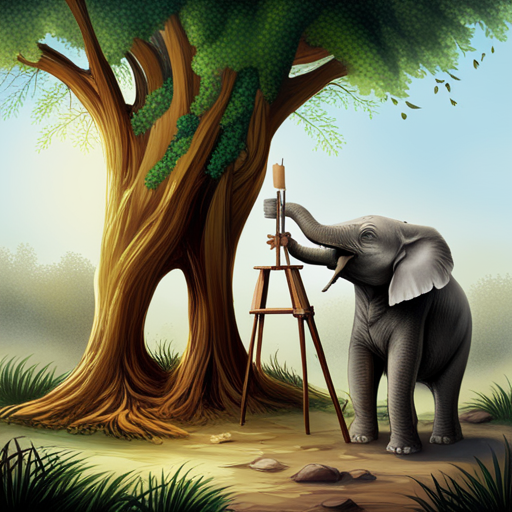

In [5]:
generate_image(
    pos_prompt = "Elephant using brush and easel to paint a tree",
    neg_prompt = "human",
    steps = 50,
    cfg_scale=5
)

In [8]:
from PIL import Image
im = Image.open("https://m.media-amazon.com/images/I/413A81uQkXL._AC_.jpg") 
im

FileNotFoundError: ignored

Please, place your name on every document you submit. Please, describe every step of your work. Please present all intermediate and final results in a single or multiple Jupyter notebooks and their HTML and/or PDF image. Your notebook(s) should include all the results, images and comments.

If your notebook(s) contain(s) excessively long outputs, please copy a meaningful and illustrative number of initial and/or final lines and paste those in a markdown (comment) cell. Then, clear the long output(s). Thank you.

